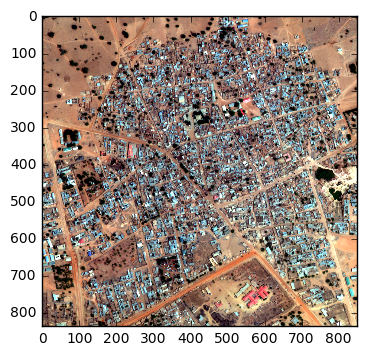

In [1]:
import os
import numpy as np
import tifffile as tiff
import cv2
import matplotlib.pyplot as plt


def stretch_8bit(bands, lower_percent=2, higher_percent=98):
    out = np.zeros_like(bands)
    for i in range(3):
        a = 0 
        b = 255 
        c = np.percentile(bands[:,:,i], lower_percent)
        d = np.percentile(bands[:,:,i], higher_percent)        
        t = a + (bands[:,:,i] - c) * (b - a) / (d - c)    
        t[t<a] = a
        t[t>b] = b
        out[:,:,i] =t
    return out.astype(np.uint8)    
    
def M(image_id):
    filename = os.path.join('..', 'input', 'sixteen_band', '{}_M.tif'.format(image_id))
    img = tiff.imread(filename)    
    img = np.rollaxis(img, 0, 3)
    return img

image_id = '6120_2_2'
m = M(image_id)
img = np.zeros((837,851,3))
img[:,:,0] = m[:,:,4] #red
img[:,:,1] = m[:,:,2] #green
img[:,:,2] = m[:,:,1] #blue
plt.imshow(stretch_8bit(img))

